# Assignment 3- Scatterplot, dimension reduction and clustering

You are strongly encouraged to work on this assignment with one or two partners. Please ensure only one submission per group: upload the PDF report to Gradescope and the code (or Jupyter notebook) to D2L. The dataset CSV file for Assignment 3 can be found on D2L.

This dataset is based on real-world data, not synthetic, so don't anticipate very clear-cut clusters or trends. There's no single correct answer to any question. Aim to thoroughly explain your analysis and the reasoning behind your choices as effectively as possible.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



In this assignement, we focus on ```heart failure clinical records dataset```,from [UCI Machine Learning repository](https://archive-beta.ics.uci.edu/). It includes the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features  and you can access more information about this dataset [here](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)


In [2]:
heart=pd.read_csv('heart_failure_clinical_records_dataset.csv')
# excludes binary vars
numerical = heart.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'])
# excludes numerical vars
categorical = heart.drop(columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'])

# Problem 1- Scatterplots (50 points) 

### (a) 10 points- (EP)
Get to know the dataset by generating summary statistics for the numerical variables, such as mean, median, and standard deviation. Address any missing values and outliers. Which variables do you think might be crucial in determining patient survival? Which variables seem to be most closely correlated.

[Summary Statistics Pandas Resource](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)

In [3]:
# mean, median, standard deviation
print("Mean Values for Numerical Data:\n" + str(numerical.mean()) + "\n")
print("Median Values for Numerical Data:\n" + str(numerical.median()) + "\n")
print("Standard Deviations for Numerical Data:\n" + str(numerical.std()) + "\n")

Mean Values for Numerical Data:
age                             60.833893
creatinine_phosphokinase       581.839465
ejection_fraction               38.083612
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
time                           130.260870
dtype: float64

Median Values for Numerical Data:
age                             60.0
creatinine_phosphokinase       250.0
ejection_fraction               38.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
time                           115.0
dtype: float64

Standard Deviations for Numerical Data:
age                            11.894809
creatinine_phosphokinase      970.287881
ejection_fraction              11.834841
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
time                           77.614208
dtype: float64



In [34]:
# missing values
numerical.isna().sum()

age                         0
creatinine_phosphokinase    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
time                        0
dtype: int64

In [45]:
# outliers code

In [16]:
# variables most correlated
numerical.corr().style.background_gradient(cmap='PRGn', axis=None)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


- Missing values: No missing values
- Outliers: 
- Crucial Survival Variables: Some of the variables most crucial to determining patient survival might include age, ejection fraction, whether the patient has hypertension or diabetes, as well as whether a patient smokes or not.
- Variables most correlated: Based on the correlation matrix generated above, it appears the variables that have the strongest correlation would be time and age, serum_sodium and serum_creatinine, and time and serum_creatinine.

### (b) 20 points (BH)
Create pair plot and correlation matrix among the different numerical variables. Comment on your findings.

In [ ]:
#pair plot
sns.pairplot(numerical)

__Pair Plot Findings:__
 - Ages 40-100 appear to to evenly spread across each numerical category
 - Low serum_creatinine is correlated with medium-to-high serum sodiums
 - Low serum creatinine seems strongly correlated with much lower creatinine phosphokinase
 - Most ages have less than 1000 KCP mcg/L (creatinine phosphokinase)

In [ ]:
# Correlation Matrix
correlationMatrix = numerical.corr()
correlationMatrix

__Correlation Matrix Findings:__
- The range of corrleation is [-.224, .176] which mostly hovers around 0. This means most categories have little correlation.
- The highest positive correlation is between ejectional fraction and serum sodium.
- The highest negative correlation is between age and time.

### (c) 20 points (EP)
Explore different pairs of variables. Create two separate scatterplots and color points based on Death variable, `DEATH_EVENT` or other categorical variables. Do you see any ditinctive groups.

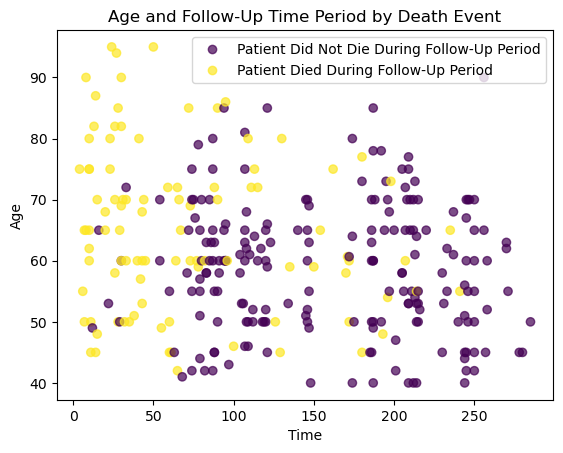

In [68]:
# scatterplot no. 1
legendLabels = ['Patient Did Not Die During Follow-Up Period', 'Patient Died During Follow-Up Period']

scatter = plt.scatter(heart['time'], heart['age'], c=heart['DEATH_EVENT'], alpha=.7)
plt.xlabel('Time')
plt.ylabel('Age')
plt.title('Age and Follow-Up Time Period by Death Event')
plt.legend(handles=scatter.legend_elements()[0], labels=legendLabels, loc='best')
plt.show()

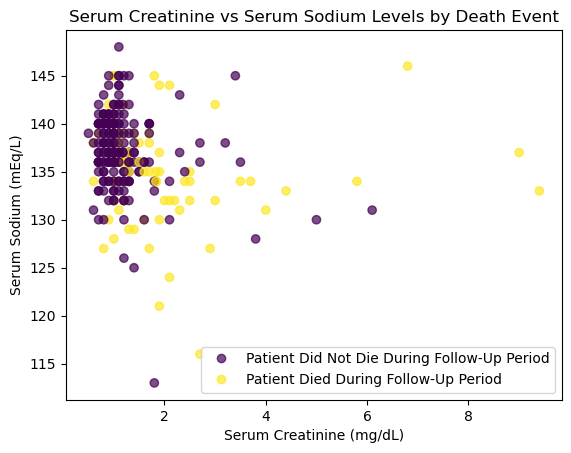

In [92]:
# scatterplot no. 2
legendLabels = ['Patient Did Not Die During Follow-Up Period', 'Patient Died During Follow-Up Period']

scatter = plt.scatter(heart['serum_creatinine'], heart['serum_sodium'], c=heart['DEATH_EVENT'], alpha=.7)
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Serum Sodium (mEq/L)')
plt.title('Serum Creatinine vs Serum Sodium Levels by Death Event')
plt.legend(handles=scatter.legend_elements()[0], labels=legendLabels, loc='best')
plt.show()

# Problem 2- Dimension Reduction (50 points) 

### (a) 15 points (BH)
Perform PCA on the **standardized numerical variables**. Plot cumulative explained variance. 
How many principal components are needed to capture 80% of the variance? Comment on your results.

In [ ]:
columnTitles = ['age', 'creatine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

#Standardize numerical set
scaler = StandardScaler()
numericalRescale = scaler.fit_transform(numerical)
numericalRescale = pd.DataFrame(numericalRescale)
numericalRescale.columns = columnTitles


#PCA on standardized Numerial Set (uses 7 components to see which ones are most useful)
numericalPCA = PCA(n_components=7)
pcaTransformedDataset = numericalPCA.fit_transform(numericalRescale) #gives me access to .components_ and explained_variance_ratio_

#Prints PCA data
# for num, pca in enumerate(numericalPCA.components_, 1):
#     s = ''
#     for index, title in enumerate(columnTitles):
#         s += f"{title}: { str(round(pca[index], 4))} | "
#     print(f"PCA{num}: \n{s}")


#cumulative explained variance
ratioSum = numericalPCA.explained_variance_ratio_.cumsum()
print('\ncumulative sum:')
print(ratioSum)

plt.bar(range(1,len(ratioSum)+1), numericalPCA.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(ratioSum)+1), ratioSum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.ylim (0,1.05)
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In order to get at 80% data capture, we would need at least six principle components. Five was slightly short by sitting at at value of 79.05% coverage.

### (b) 20 points (EP)
Construct a biplot that displays the data points and the loadings of each original feature in the PC1-PC2 space. Label the loading vectors (arrows). Share your observations. Discuss which type of patient is best represented in each quadrant of the plot.

In [ ]:
numericalTransformed = numericalPCA.fit_transform(numericalRescale)
loadings = numericalPCA.components_

# alter plot size so that legend will not overlap with datapoints
plt.figure(figsize=(9, 5))
plt.scatter(numericalTransformed[:,0], numericalTransformed[:,1], color='k')

scalingFactor = 5.5

columnTitles = numerical.columns.tolist()

for i in range(loadings.shape[1]):
    arrowColor = plt.cm.tab10(i / loadings.shape[1])
    plt.arrow(0, 0, scalingFactor*loadings[0, i], scalingFactor*loadings[i, i],  color=arrowColor, linewidth=2, head_width=.2, head_length=.2, label=columnTitles[i])
    
plt.axis('equal');
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# create legend
plt.legend(loc='upper right')

plt.title("Loadings of Original Features on PC1 and PC2")


### (c) 15 points (BH)
Color-code the data points based on DEATH_EVENT or other categorical variables within the dataset. Evaluate whether dimension reduction has facilitated a clearer distinction between the various patient groups.

# Problem 3- Clustering (100 points) 

### (a) 15 points (BH)
Apply K-means clustering to the PCA-transformed data (referencing the number of PCA components selected in 2a). Experiment with a variety of K values and graph the resulting Inertias and Average Silhouette Coefficients for each K. Analyze the graphs to determine the optimal number of clusters. Which cluster count do you prefer when considering both metrics?

In [ ]:
#==============================================================================================
#                           KMeans Clustering
#==============================================================================================

# 'pcaTransformedDataset' is the pca-transformed numpy array
n_loops = 30 # consistent int to have the inertia and silhouette graph loop the same amount
inertias = np.zeros(n_loops)
#retrieves interias and fills them in empty array
for i in range(1, n_loops+1):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(pcaTransformedDataset)
    inertias[i-1] = kmeans.inertia_
#plots inertia
plt.plot(range(1,n_loops+1), inertias, c='b', marker='.')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

#==============================================================================================
#                     Average Silhouette scores
#==============================================================================================

S_scores = []
for n_clusters in range(2, n_loops+1):
    km = KMeans(n_clusters=n_clusters)
    
    # Predict the cluster for each data point
    preds = km.fit_predict(pcaTransformedDataset)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(pcaTransformedDataset, preds, metric='euclidean')
    S_scores.append(score)

plt.plot(range(2,n_loops+1), S_scores, c='b', marker='.')
plt.title(" Average silhouette_score vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette_score")
plt.grid("y-axis")
plt.show()


When considering the inertia graph and the average silhouette graph, the optimal number of clusters appears to be 10. 10 is at the lower end of the interia 'elbow' as well as being the peak average silhouette score when testing 30 cluster sizes. Since this is most likely a local minimum, the graph shifts each time the program is run. After running it a handful of times, 10 has peaked the most on the average silhouette score.

### (b) 20 points (BH)
Interpret the characteristics of typical patients in each cluster for the chosen K value from the previous question. This involves reversing the PCA and standard scaler transformations applied to the centroid vectors. Share your insights on the findings. Are there any notable differences between the clusters?

In [ ]:
# reverses pca
originalNumData = numericalPCA.inverse_transform(pcaTransformedDataset)
# reverses Standard Scaler
originalNumData = scaler.inverse_transform(originalNumData)

#
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300) #kmeans requires knowing the number of clusters. In this case we wouldnt know there are 4 so we assume 3
pred_cluster_labels = kmeans.fit_predict(originalNumData) #array that tells you which point exists in which cluster

plt.scatter(originalNumData[:,2],originalNumData[:,5], c=pred_cluster_labels)
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=50)
plt.xlabel("Ejectional Fraction")
plt.ylabel("Serum Sodium")
plt.title("Numerical Heart Failure K-Means Clusters")
plt.show()


Most of the clusters do not appear to have any correlation.The graph above is a visualization of the variables that had the most correlation: ejectional fraction and serum sodium. Even with this graph, each cluster appears to be randomly dispersed.

### (c) 20 points (BH)
Using only the first two principal components (PCs), generate two scatterplot subplots. In the first subplot, color-code the data points according to the predicted cluster assignments. In the second subplot, use color-coding to represent 'death' or other categorical variables. Examine both plots and share any significant findings or patterns that become apparent from this comparative analysis.

In [ ]:
heartPCA = PCA(n_components=2) # two Principle Components
heart_transformed = heartPCA.fit_transform(heart)
kmeans = KMeans(n_clusters=10, init='k-means++') #kmeans requires knowing the number of clusters. In this case we wouldnt know there are 4 so we assume 3
pred_cluster_labels = kmeans.fit_predict(originalNumData)

fig, axes = plt.subplots(1,2, figsize =(10,5) )
#left plot
s1 = axes[0].scatter(heart_transformed[:,0], heart_transformed[:,1], c=pred_cluster_labels, alpha=.6)
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")
axes[0].set_title("PCA1 and PCA2 colored by cluster group")

#right plot
s2 = axes[1].scatter(heart_transformed[:,0], heart_transformed[:,1], c=heart['DEATH_EVENT'], alpha=.6)
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")
axes[1].set_title("PCA1 and PCA2 compared to DEATH_EVENT")

#legends
deathLabel = ['Alive', 'Dead']
clusterLabel = [i for i in range(1,13)]
axes[0].legend(handles=s1.legend_elements()[0], labels=clusterLabel, loc='upper right')
axes[1].legend(handles=s2.legend_elements()[0], labels=deathLabel, loc='upper right')



In problem 3b, we were generating clusters against the original numerical datapoints. When we graphed those, cluster points appeared to bea randomly spread out for eaceh graph. Howver, once you graph the PCAs as a whole, there is a clear distinction between each cluster. By only analyzing correlation between individual variables, we would never be able to identify these groups. The death_event graph is more spread out than I expected. There are more living outliers when looking towards the high-end of the first principle component. The inverse is true for the second principle component, the outliers are deceased toward the higher end. In terms of the average, death is consistent between all varialbes since the the majority of the PCA data is centered around the intersection between zero PCA 1 and zero PCA 2.

### (d) 15 points (EP)

Construct dendrograms for various linkage methods (complete, single, ward). Assess which linkage method appears most suitable. Determine the most appropriate number of clusters based on the dendrograms.

### (e) 15 points (EP)
Redo part a of problem 3, but use hierarchical clustering (AgglomerativeClustering) in place of k-means. Use the the linkage type you chose in previous question. Test different numbers of clusters and plot the resulting Inertias and Average Silhouette Coefficients for each cluster count. Examine these plots to identify the ideal number of clusters. Based on both metrics, which number of clusters seems most appropriate? Compare the results with those obtained from part a; did the choice of clustering method lead to a different outcome? 

### (f) 15 points (EP)
Redo part c and compare the results. Any significant difference?